<a href="https://colab.research.google.com/github/Leonardopedroti/ANA_shapefile/blob/main/ANA_Shapefile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Instalação e importação dos pacotes
!pip install --upgrade geopandas
!pip install --upgrade rasterio
!pip install --upgrade rasterstats
!pip install pyproj
!pip install shapely
!pip install hydrobr
!pip install seaborn
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show
import os
from rasterstats import zonal_stats
from shapely.geometry import Point
import hydrobr
import pandas as pd
from matplotlib import pyplot
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import plot
from PIL import Image
import folium

Text(0.5, 1.0, 'Mapa com limites municipais do Estado de São Paulo')

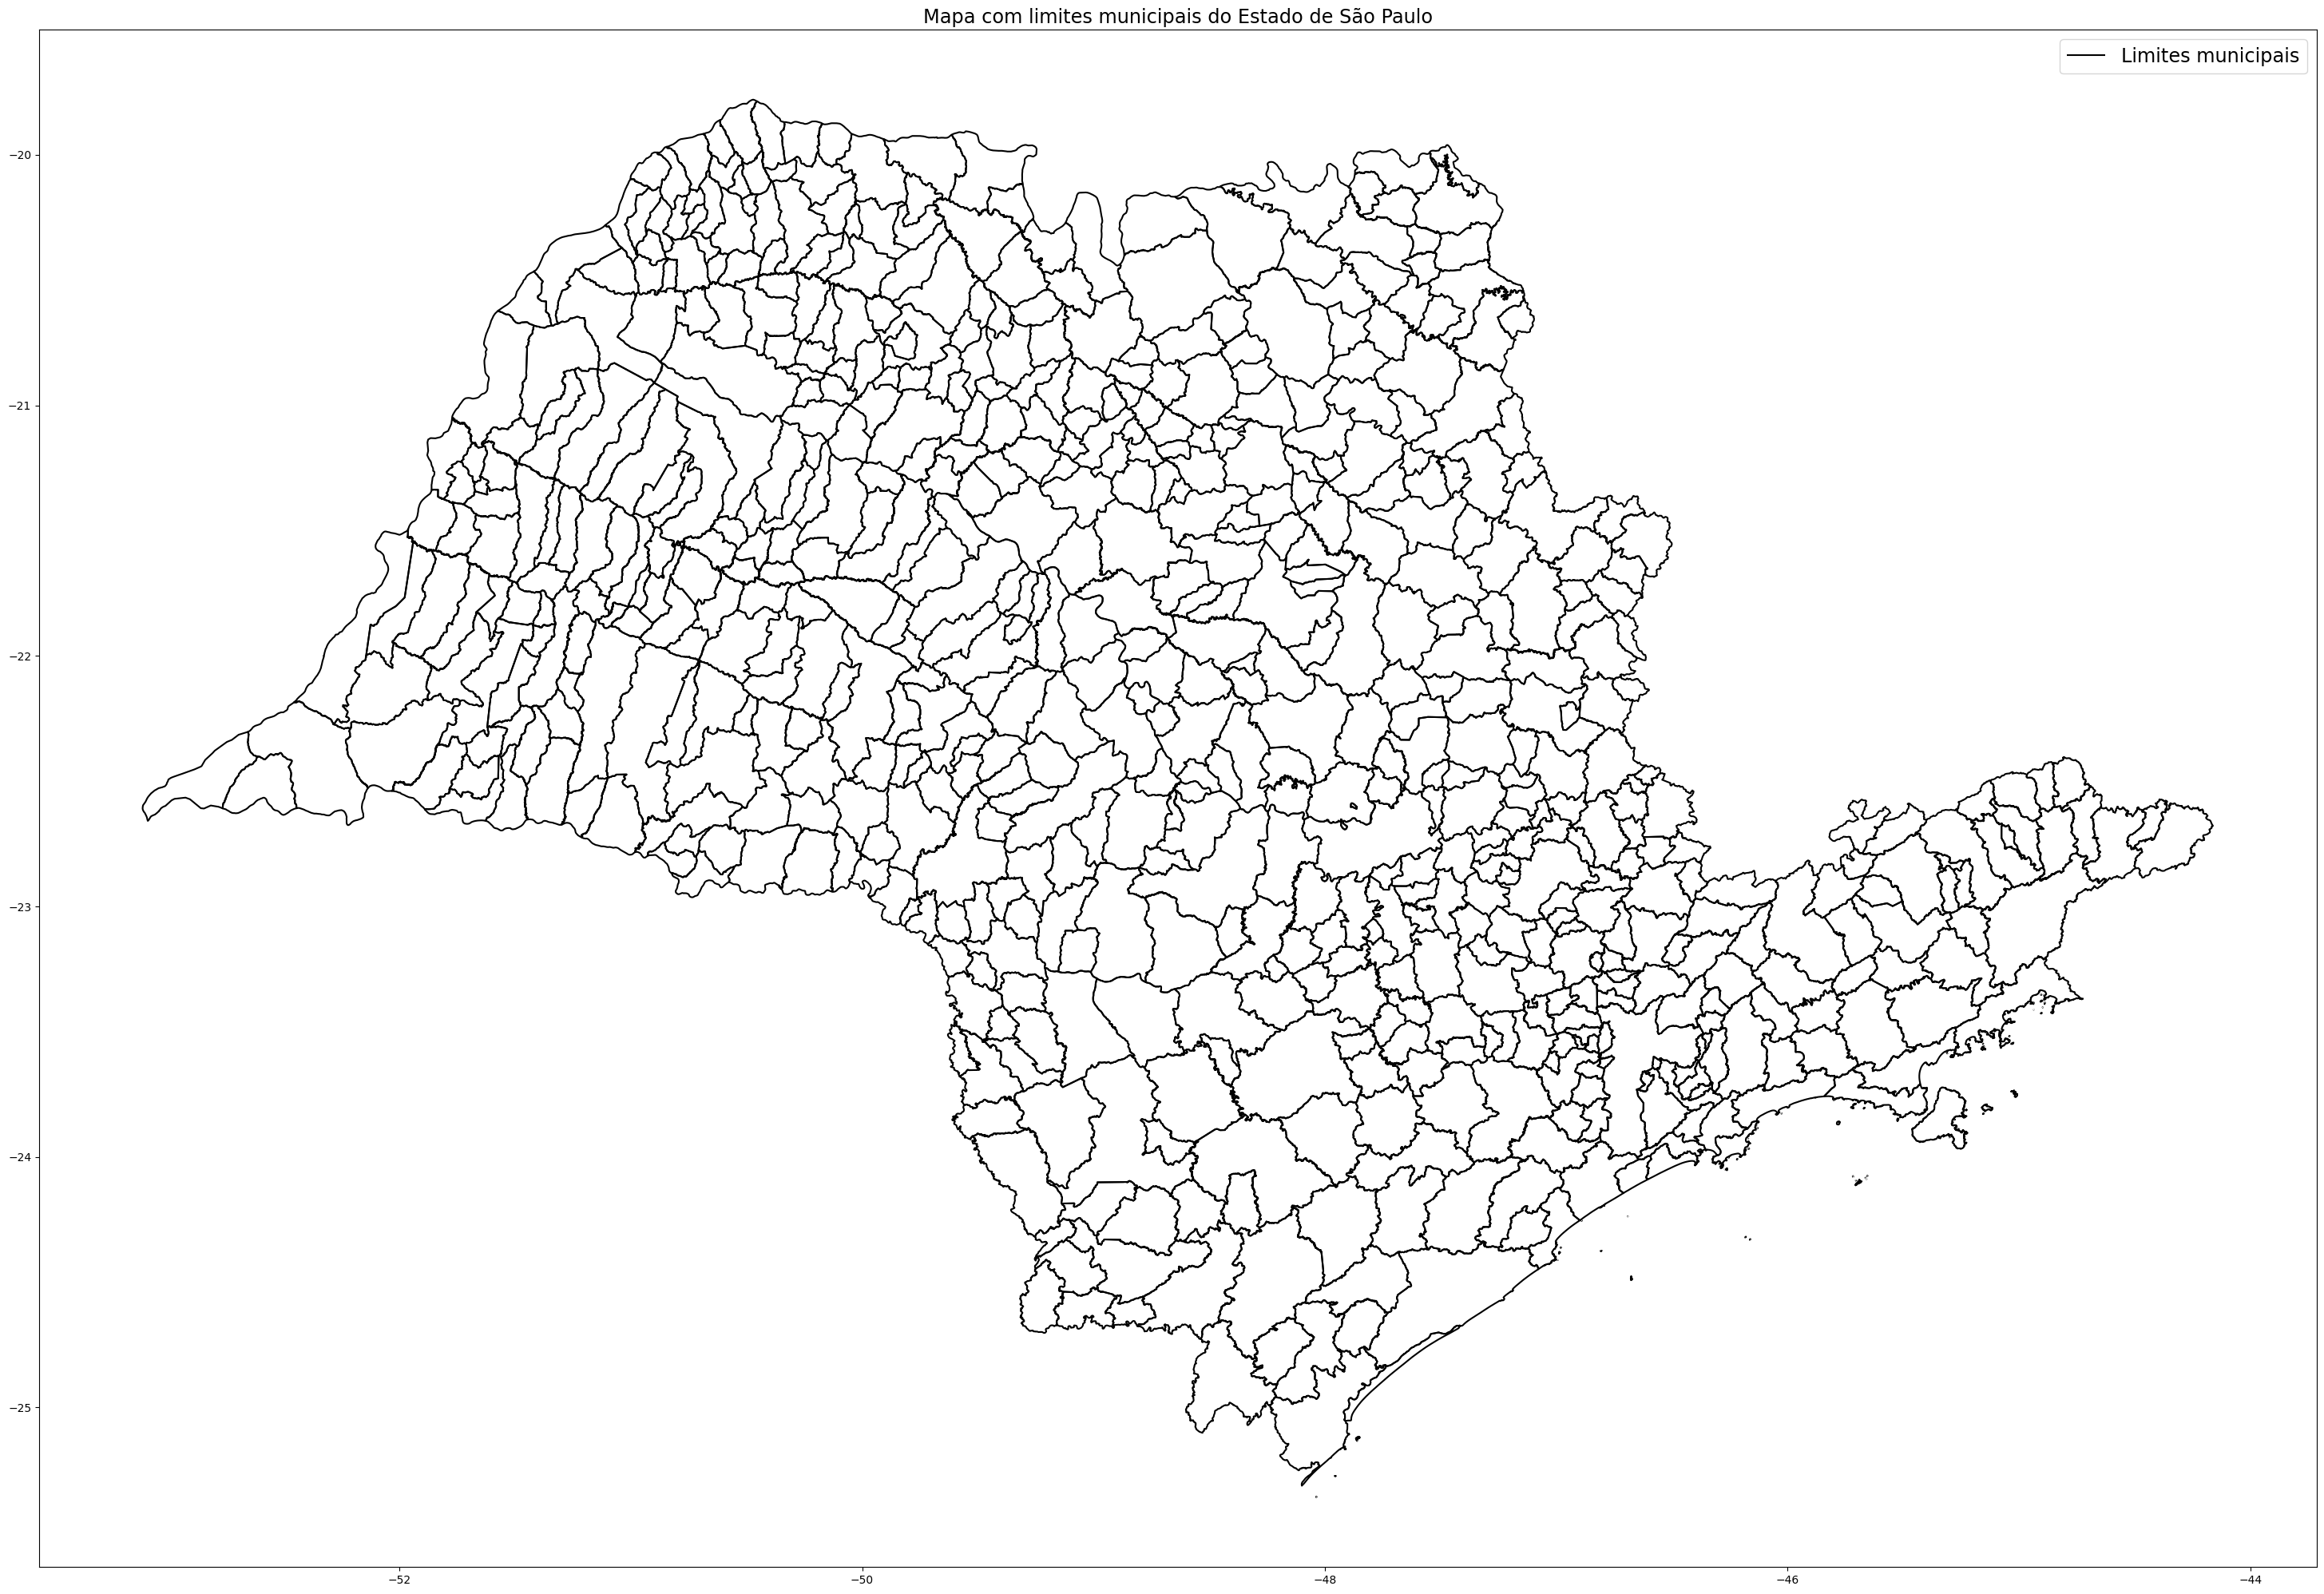

In [92]:
#Importação do arquivo Shapefile da base de dados do IBGE
adc = gpd.read_file('/content/SP_Municipios_2022.shp')
#Visualização do arquivo shapefile dos limites municipais de cada cidade do estado de Estado de São Paulo.
fig, ax = plt.subplots(figsize = (50, 25))
adc['geometry'].boundary.plot(ax = ax, color = 'black')
plt.legend(['Limites municipais'], fontsize='xx-large')
plt.title('Mapa com limites municipais do Estado de São Paulo', fontsize='xx-large')

<Axes: title={'center': 'Municipios selecionados'}>

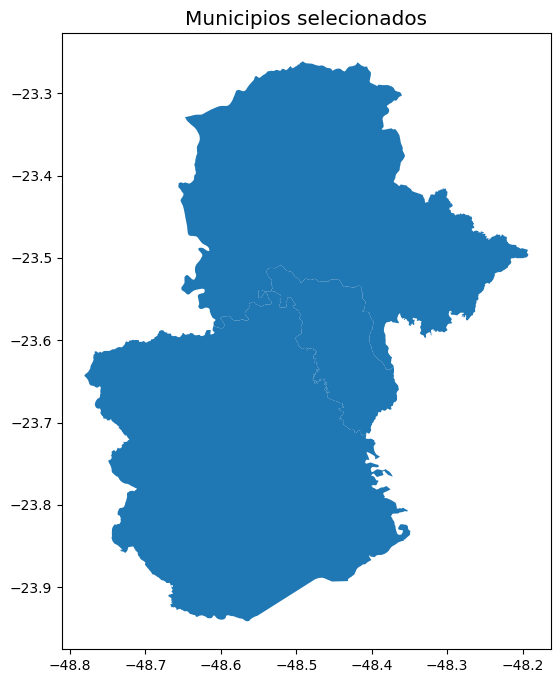

In [79]:
#Extração dos municipios de interesse com base no atributo "NM_MUN".
municipio = adc[adc['NM_MUN'].isin(['Buri', 'Campina do Monte Alegre', 'Angatuba'])]
fig, ax = plt.subplots(figsize=(9, 8))
plt.title('Municipios selecionados', fontsize='x-large')
municipio.plot(ax=ax)

In [87]:
#Importação do banco de dados da ANA com as suas respectivas estações de monitoramento.
lista_estaçoes_geral = hydrobr.get_data.ANA.list_prec_stations()
#Extração das cidades de interesse.
lista_estaçoes_city = lista_estaçoes_geral[lista_estaçoes_geral['City'].isin(['BURI', 'CAMPINA DO MONTE ALEGRE', 'ANGATUBA'])]
#Conversão das cidades escolhidas em dataframe do Pandas
df = pd.DataFrame(lista_estaçoes_city)
#Extração dos atributos Lat/Long do respectivo dataframe
lat_long = ['Latitude', 'Longitude']
lat_long_extraidas = df[lat_long]
#Exportação do dataframe Lat/Long para um formato csv
lat_long_extraidas.to_csv('lat_long_extraidas.csv', index=False)

In [88]:
#
coordenadas_caminho = ('/content/lat_long_extraidas.csv')

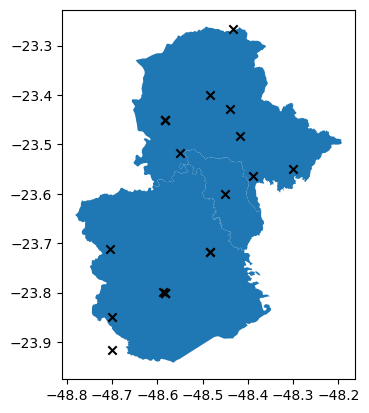

In [99]:
#
municipio = adc[adc['NM_MUN'].isin(['Buri', 'Campina do Monte Alegre', 'Angatuba'])]
municipio.plot()
lat_long = ['Latitude', 'Longitude']
lat_long_extraidas = df[lat_long]
lat_long_extraidas
plt.scatter(lat_long_extraidas['Longitude'], lat_long_extraidas['Latitude'], color='black', marker='x')
plt.show()

In [ ]:
coordenadas = gpd.read_file(coordenadas_caminho)
coordenadas['geometry'] = coordenadas.apply(lambda row: Point(row['Longitude'], row['Latitude']), axis=1)
shapefile_combinado = gpd.overlay(adc, coordenadas, how='union')

In [ ]:
shapefile_combinado.to_file("/content/novo_arquivo.shp")

In [ ]:
shapefile_combinado_path = "/content/novo_arquivo.shp"
shapefile_combinado = gpd.read_file(shapefile_combinado_path)

In [ ]:
mapa = folium.Map(location=[shapefile_combinado.geometry.centroid.y.mean(), shapefile_combinado.geometry.centroid.x.mean()], zoom_start=10)

<ipython-input-24-f825e6887af3>:1: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




In [ ]:
folium.GeoJson(shapefile_combinado).add_to(mapa)

In [ ]:
mapa